In [1]:
# initial garbage tries are in git repository, this version summarize hours of work (above 20) to set score in kaggle 0.12
# there are still more ideas which will be implement and test when there are more tries in kaggle platform

# import needed libriries alongside with removing some warning so they don't show up
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Summerize of the idea -> load all data, fill and massage them at the same time (train ant test data), because no need
# to make same action, after that will train model and will produce result

In [3]:
train_data = pd.read_csv('../MachineLearningCourse/train.csv', index_col=['Id'])
test_data = pd.read_csv('../MachineLearningCourse/test.csv', index_col=['Id'])

In [4]:
print(test_data.shape)
print(train_data.shape)

(1459, 79)
(1460, 80)


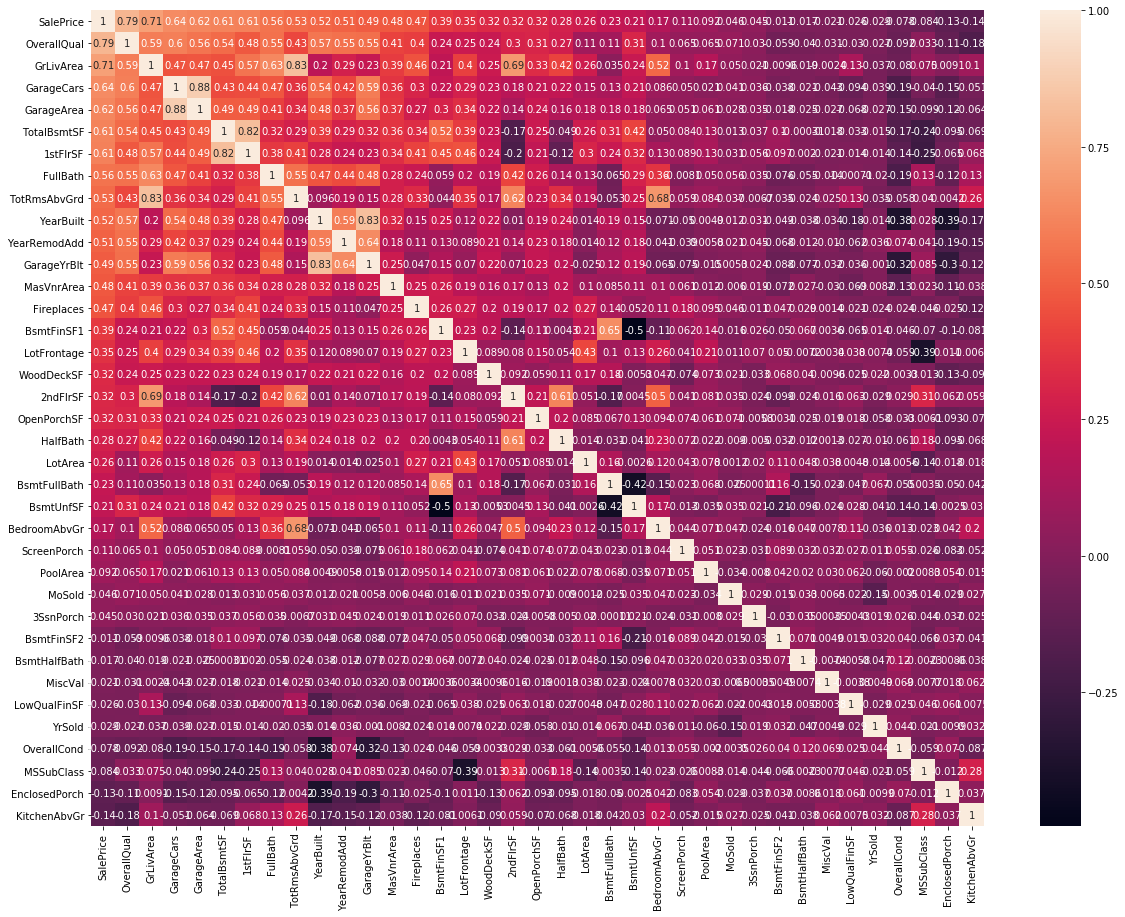

In [5]:
# before dropping salePrice want to check correlation model, so later will check some of the variables

corr=train_data.corr()
top_corr=train_data[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)


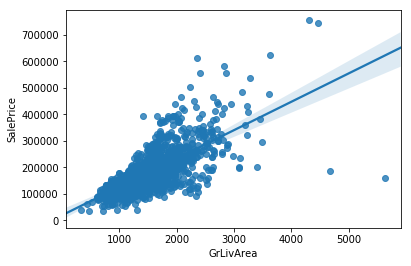

In [6]:
sns.regplot(train_data['GrLivArea'], train_data['SalePrice'])

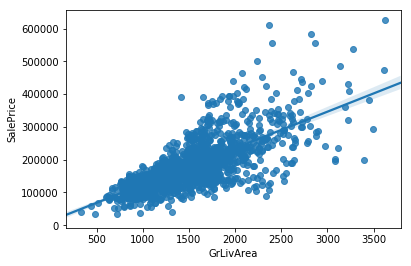

In [8]:
# some nasty outliers will get rid of them
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)
                                       | (train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] > 600000)].index)
sns.regplot(train_data['GrLivArea'], train_data['SalePrice'])

In [9]:
train_labels = train_data.pop('SalePrice')

features = pd.concat([train_data, test_data], keys=['train_data', 'test_data'])

In [10]:
features

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
           Id                                                             
train_data 1             60       RL         65.0     8450   Pave   NaN   
           2             20       RL         80.0     9600   Pave   NaN   
           3             60       RL         68.0    11250   Pave   NaN   
           4             70       RL         60.0     9550   Pave   NaN   
           5             60       RL         84.0    14260   Pave   NaN   
           6             50       RL         85.0    14115   Pave   NaN   
           7             20       RL         75.0    10084   Pave   NaN   
           8             60       RL          NaN    10382   Pave   NaN   
           9             50       RM         51.0     6120   Pave   NaN   
           10           190       RL         50.0     7420   Pave   NaN   
           11            20       RL         70.0    11200   Pave   NaN   
           12            60       RL         85.0    11924   Pave   NaN   
           13            20       RL          NaN    12968   Pave   NaN   
           14            20       RL         91.0    10652   Pave   NaN   
           15            20       RL          NaN    10920   Pave   NaN   
           16            45       RM         51.0     6120   Pave   NaN   
           17            20       RL          NaN    11241   Pave   NaN   
           18            90       RL         72.0    10791   Pave   NaN   
           19            20       RL         66.0    13695   Pave   NaN   
           20            20       RL         70.0     7560   Pave   NaN   
           21            60       RL        101.0    14215   Pave   NaN   
           22            45       RM         57.0     7449   Pave  Grvl   
           23            20       RL         75.0     9742   Pave   NaN   
           24           120       RM         44.0     4224   Pave   NaN   
           25            20       RL          NaN     8246   Pave   NaN   
           26            20       RL        110.0    14230   Pave   NaN   
           27            20       RL         60.0     7200   Pave   NaN   
           28            20       RL         98.0    11478   Pave   NaN   
           29            20       RL         47.0    16321   Pave   NaN   
           30            30       RM         60.0     6324   Pave   NaN   
...                     ...      ...          ...      ...    ...   ...   
test_data  2890          30       RM         50.0     7030   Pave   NaN   
           2891          50       RM         75.0     9060   Pave   NaN   
           2892          30  C (all)         69.0    12366   Pave   NaN   
           2893         190  C (all)         50.0     9000   Pave   NaN   
           2894          50  C (all)         60.0     8520   Grvl   NaN   
           2895         120       RM         41.0     5748   Pave   NaN   
           2896         120       RM         44.0     3842   Pave   NaN   
           2897          20       RL         69.0    23580   Pave   NaN   
           2898          90       RL         65.0     8385   Pave   NaN   
           2899          20       RL         70.0     9116   Pave   NaN   
           2900          80       RL        140.0    11080   Pave   NaN   
           2901          20       RL          NaN    50102   Pave   NaN   
           2902          20       RL          NaN     8098   Pave   NaN   
           2903          20       RL         95.0    13618   Pave   NaN   
           2904          20       RL         88.0    11577   Pave   NaN   
           2905          20      NaN        125.0    31250   Pave   NaN   
           2906          90       RM         78.0     7020   Pave   NaN   
           2907         160       RM         41.0     2665   Pave   NaN   
           2908          20       RL         58.0    10172   Pave   NaN   
           2909          90       RL          NaN    11836   Pave   NaN   
           2910         180       RM      

In [11]:
# Remove some the features (like those who have more then half of missing data)

features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [12]:
features.shape

(2915, 55)

In [13]:
###### --------- THERE ARE INCOMPLETE DATA FROM DATASET (NA -> NAN -> AND SO ON)
features.isnull()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
           Id                                                                
train_data 1          False     False        False    False   False   True   
           2          False     False        False    False   False   True   
           3          False     False        False    False   False   True   
           4          False     False        False    False   False   True   
           5          False     False        False    False   False   True   
           6          False     False        False    False   False   True   
           7          False     False        False    False   False   True   
           8          False     False         True    False   False   True   
           9          False     False        False    False   False   True   
           10         False     False        False    False   False   True   
           11         False     False        False    False   False   True   
           12         False     False        False    False   False   True   
           13         False     False         True    False   False   True   
           14         False     False        False    False   False   True   
           15         False     False         True    False   False   True   
           16         False     False        False    False   False   True   
           17         False     False         True    False   False   True   
           18         False     False        False    False   False   True   
           19         False     False        False    False   False   True   
           20         False     False        False    False   False   True   
           21         False     False        False    False   False   True   
           22         False     False        False    False   False  False   
           23         False     False        False    False   False   True   
           24         False     False        False    False   False   True   
           25         False     False         True    False   False   True   
           26         False     False        False    False   False   True   
           27         False     False        False    False   False   True   
           28         False     False        False    False   False   True   
           29         False     False        False    False   False   True   
           30         False     False        False    False   False   True   
...                     ...       ...          ...      ...     ...    ...   
test_data  2890       False     False        False    False   False   True   
           2891       False     False        False    False   False   True   
           2892       False     False        False    False   False   True   
           2893       False     False        False    False   False   True   
           2894       False     False        False    False   False   True   
           2895       False     False        False    False   False   True   
           2896       False     False        False    False   False   True   
           2897       False     False        False    False   False   True   
           2898       False     False        False    False   False   True   
           2899       False     False        False    False   False   True   
           2900       False     False        False    False   False   True   
           2901       False     False         True    False   False   True   
           2902       False     False         True    False   False   True   
           2903       False     False        False    False   False   True   
           2904       False     False        False    False   False   True   
           2905       False      True        False    False   False   True   
           2906       False     False        False    False   False   True   
           2907       False     False        False    False   False   True   
           2908       False     False  

In [16]:
# still we have columns with null values so next will transform those features

##### FEATURE TUNING AND REPRESENTATION:
# Long story short -> where we see that we can encode category data will do it with label encoder, when we have some kind
# of data power unit (this can be done by brutforce change of data with numeric reprewsentation); when data does
# handle some kind of power meaning can be used one-hot-encoder
# 
# When there aren't any data representing feature then they will be tune with std, average or will create new feature with
# appropriate data when possible (for numerical one)

In [17]:
# feature MSSubClass is numeric but better to be categorical data, so as that been said will transofrm it to string
features['MSSubClass'] = features['MSSubClass'].astype(str)

# MSZoning is little more tricky, here will assume something like kNN algorithm and will get most frequently type
# think of how with kNN we can get correct type???
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

# Assume that if no data in Alley, there is no alley there - add new value inaccessible 
features['Alley'] = features['Alley'].fillna('Unaccessible');

# TRY WITH CONDITIONS AS STINGSSS
# features.OverallCondition = features.OverallCondition.astype(str)




In [18]:
features.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# all basements and garage values will be threaten as if no information then there is no such element
def fill_bsmnt_data(data):
    for element in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        data[element] = data[element].fillna('NoBasement')
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
    
def fill_garage_data(data_frame):
    for element in ['GarageType', 'GarageFinish', 'GarageQual']:
        data_frame[element] = data_frame.fillna('NoGarage')
    data_frame['GarageCars'] = data_frame['GarageCars'].fillna(0)

In [20]:
!head -100 ../MachineLearningCourse/data_description.txt | grep "Total"

In [21]:
# No information for Total for any of partion features so will create some new features and will remove others

In [22]:
# Little of data in MasVnrType is without data so fill it with most frequantly value will handle it
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])


# no data for basement will be treaten like there is no basement at all , so new value will be introduse to our model NoBasement
fill_bsmnt_data(features)

# same as previously data we fill with frequently one
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

features['FireplaceQu'] = features['FireplaceQu'].fillna('NonFireplacement')

fill_garage_data(features)

features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features['YrSold'] = features['YrSold'].astype(str)

features['MoSold'] = features['MoSold'].astype(str)




In [23]:
# add new feature that will show overall area of appartment, if there is no data for component which is in calculation fill with 0

# create new feature
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

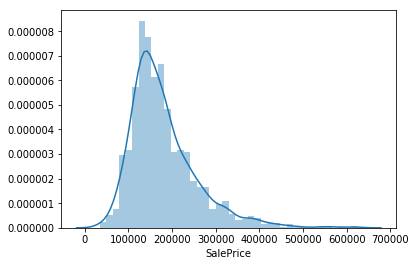

In [24]:
# check data from vector that need to be our result one
sns.distplot(train_labels)

In [25]:
# it have right tail squeezed (something like chi square distribution with k = 3)
# To make data more normal will make transformation by logarithm
train_labels = np.log(train_labels)

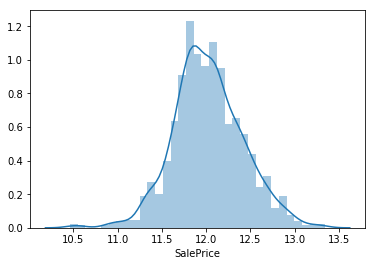

In [26]:
# will plot it again to see if there is needed result 
sns.distplot(train_labels)

In [27]:
# after transforming our "label" set we will continue with our feature "massage, some of ideas are get from here **https://www.biomedware.com/files/documentation/boundaryseer/Preparing_data/Methods_for_data_standardization.htm**



In [28]:
features.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,TotalSF
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,69.128860,10133.648714,6.083705,5.565009,1971.271698,1984.240480,1496.263465,1.566381,0.379417,2.859348,6.445626,0.595197,1.764666,2539.589708
std,20.734842,7806.198515,1.403444,1.113718,30.290998,20.897341,491.239383,0.551377,0.502692,0.822707,1.562047,0.643945,0.761677,773.270203
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,334.000000
25%,60.000000,7474.000000,5.000000,5.000000,1953.000000,1965.000000,1125.500000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,2000.000000
50%,69.128860,9450.000000,6.000000,5.000000,1973.000000,1993.000000,1442.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,2446.000000
75%,78.000000,11554.500000,7.000000,6.000000,2001.000000,2004.000000,1742.500000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,2989.500000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,4.000000,2.000000,8.000000,15.000000,4.000000,5.000000,10190.000000


In [29]:
# features[features.describe().columns]


In [30]:
# This broke some of corelations and produce more noise in model
# numeric_features_col = features.describe().columns
# numeric_features = features[numeric_features_col]
# numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [31]:
# TRY MAKING ONLY THOSE
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()


categorical_columns = features.dtypes[features.dtypes == 'object'].index

In [32]:
categorical_columns
cc = features[categorical_columns]

In [33]:
cc.dtypes

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenAbvGr     object
KitchenQual      object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
MoSold           object
YrSold           object
SaleType         object
SaleCondition    object
dtype: object

In [35]:
# One of earlier version will transform it to work on full set of data, but for now this was half successfull option
# and will encode data with idea found in kernels

# # Encode categorical data
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# categorical_columns = features.dtypes[features.dtypes == 'object'].index

# # just in case that there are some data that is not transfered
# for col in categorical_columns:
#     features[col] = features[col].astype(str)

# train_data_features = features.loc['test_data']
# test_data_features = features.loc['train_data']    
    
# encoders_train = {col: LabelEncoder().fit(train_data_features[col]) for col in categorical_columns}
# encoders_test = {col: LabelEncoder().fit(test_data_features[col]) for col in categorical_columns}

# def encode_categorical(data, columns, encoders):
#     return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
#                         index = data.index)

# train_encoded = encode_categorical(train_data_features, categorical_columns, encoders_train)
# test_encoded = encode_categorical(test_data_features, categorical_columns, encoders_test)

# one_hot_encoded_train = OneHotEncoder().fit(train_encoded)
# one_hot_encoded_test = OneHotEncoder().fit(test_encoded)

In [36]:
# working one_hot_X_train_features = one_hot_encoded_train.transform(train_encoded)
# one_hot_X_test_features = one_hot_encoded_test.transform(test_encoded)

In [37]:
features
# one_hot_x_features.shape

MSSubClass MSZoning  LotFrontage  LotArea Street  \
           Id                                                      
train_data 1            60       RL     65.00000     8450   Pave   
           2            20       RL     80.00000     9600   Pave   
           3            60       RL     68.00000    11250   Pave   
           4            70       RL     60.00000     9550   Pave   
           5            60       RL     84.00000    14260   Pave   
           6            50       RL     85.00000    14115   Pave   
           7            20       RL     75.00000    10084   Pave   
           8            60       RL     69.12886    10382   Pave   
           9            50       RM     51.00000     6120   Pave   
           10          190       RL     50.00000     7420   Pave   
           11           20       RL     70.00000    11200   Pave   
           12           60       RL     85.00000    11924   Pave   
           13           20       RL     69.12886    12968   Pave   
           14           20       RL     91.00000    10652   Pave   
           15           20       RL     69.12886    10920   Pave   
           16           45       RM     51.00000     6120   Pave   
           17           20       RL     69.12886    11241   Pave   
           18           90       RL     72.00000    10791   Pave   
           19           20       RL     66.00000    13695   Pave   
           20           20       RL     70.00000     7560   Pave   
           21           60       RL    101.00000    14215   Pave   
           22           45       RM     57.00000     7449   Pave   
           23           20       RL     75.00000     9742   Pave   
           24          120       RM     44.00000     4224   Pave   
           25           20       RL     69.12886     8246   Pave   
           26           20       RL    110.00000    14230   Pave   
           27           20       RL     60.00000     7200   Pave   
           28           20       RL     98.00000    11478   Pave   
           29           20       RL     47.00000    16321   Pave   
           30           30       RM     60.00000     6324   Pave   
...                    ...      ...          ...      ...    ...   
test_data  2890         30       RM     50.00000     7030   Pave   
           2891         50       RM     75.00000     9060   Pave   
           2892         30  C (all)     69.00000    12366   Pave   
           2893        190  C (all)     50.00000     9000   Pave   
           2894         50  C (all)     60.00000     8520   Grvl   
           2895        120       RM     41.00000     5748   Pave   
           2896        120       RM     44.00000     3842   Pave   
           2897         20       RL     69.00000    23580   Pave   
           2898         90       RL     65.00000     8385   Pave   
           2899         20       RL     70.00000     9116   Pave   
           2900         80       RL    140.00000    11080   Pave   
           2901         20       RL     69.12886    50102   Pave   
           2902         20       RL     69.12886     8098   Pave   
           2903         20       RL     95.00000    13618   Pave   
           2904         20       RL     88.00000    11577   Pave   
           2905         20       RL    125.00000    31250   Pave   
           2906         90       RM     78.00000     7020   Pave   
           2907        160       RM     41.00000     2665   Pave   
           2908         20       RL     58.00000    10172   Pave   
           2909         90       RL     69.12886    11836   Pave   
           2910        180       RM     21.00000     1470   Pave   
           2911        160       RM     21.00000     1484   Pave   
           2912         20       RL     80.00000    13384   Pave   
           2913        160       RM     21.00000     1533   Pave   
           2914        160       RM     21.00000     1526   Pave   
           2915        160       RM     21.00000     1936   Pave   
    

In [38]:
# working train_data_features.drop(categorical_columns, axis=1, inplace=True)
# test_data_features.drop(categorical_columns, axis=1, inplace=True)

# pd.DataFrame(one_hot_features.todense(), axis=1)

In [39]:
# train_data_features.shape

# features.drop(categorical_columns, axis=1, inplace=True)

# features = pd.concat([features, pd.DataFrame(one_hot_features.todense())], axis=1)

In [40]:
# one_hot_x_features.shape

# features = pd.concat([features, one_hot_x_features.todense], axis=1)
# features.drop(categorical_columns, axis=1, inplace=True)

# working
# feature_test = pd.np.concatenate([one_hot_X_test_features.todense(), test_data_features], axis=1)
# features_train = pd.np.concatenate([one_hot_X_train_features.todense(), train_data_features], axis=1)


# for col in categorical_columns:
#     features.drop([col], axis=1, inplace=True)

# features.drop(categorical_columns, axis=1, inplace=True)

In [41]:
features.shape

(2915, 53)

In [42]:
# one_hot_x_features = one_hot_encoder.transform(train_encoded)

from sklearn.linear_model import LinearRegression

# cat_regression = LinearRegression().fit(feature_test, train_labels)
# print(cat_regression.score(feature_test, train_labels)) 0.9235768800630646

# one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
# print(cat_regression.score(one_hot_x_test, y_test))

In [43]:
# Those Idea is get by one kernel forum to make set of similar condition then manual code it and drop it
conditions = set([x for x in features['Condition1']] + [x for x in features['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(conditions))),
                       index=features.index, columns=conditions)

for i, cond in enumerate(zip(features['Condition1'], features['Condition2'])):
    dummies.ix[i, cond] = 1
features = pd.concat([features, dummies.add_prefix('Condition_')], axis=1)
features.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# -- next
exteriors = set([x for x in features['Exterior1st']] + [x for x in features['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(exteriors))),
                       index=features.index, columns=exteriors)
for i, ext in enumerate(zip(features['Exterior1st'], features['Exterior2nd'])):
    dummies.ix[i, ext] = 1
features = pd.concat([features, dummies.add_prefix('Exterior_')], axis=1)
features.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# -- next
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [44]:
### Make two seperatly samples so we can work with standartization and make mix models
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)


In [45]:
features.loc['train_data']


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.00000,8450,7,5,2003,2003,1710,2,1,3,...,0,0,0,1,0,0,0,0,1,0
2,80.00000,9600,6,8,1976,1976,1262,2,0,3,...,0,0,0,1,0,0,0,0,1,0
3,68.00000,11250,7,5,2001,2002,1786,2,1,3,...,0,0,0,1,0,0,0,0,1,0
4,60.00000,9550,7,5,1915,1970,1717,1,0,3,...,0,0,0,1,1,0,0,0,0,0
5,84.00000,14260,8,5,2000,2000,2198,2,1,4,...,0,0,0,1,0,0,0,0,1,0
6,85.00000,14115,5,5,1993,1995,1362,1,1,1,...,0,0,0,1,0,0,0,0,1,0
7,75.00000,10084,8,5,2004,2005,1694,2,0,3,...,0,0,0,1,0,0,0,0,1,0
8,69.12886,10382,7,6,1973,1973,2090,2,1,3,...,0,0,0,1,0,0,0,0,1,0
9,51.00000,6120,7,5,1931,1950,1774,2,0,2,...,0,0,0,1,1,0,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

### Splitting
x_train, x_test, y_train, y_test = train_test_split(features.loc['train_data'], train_labels, test_size=0.3, random_state=4330)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(features_standardized.loc['train_data'], train_labels, test_size=0.3, random_state=4300)



In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble

cat_regression = LinearRegression().fit(x_train, y_train)
gbr = ensemble.GradientBoostingRegressor(n_estimators=9000, learning_rate=0.0009, max_depth=10, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=5, loss='huber', random_state=4330).fit(x_train_st, y_train_st)

In [48]:
print("Train: ", cat_regression.score(x_train, y_train))
print("Test: ", cat_regression.score(x_test, y_test))

print("Train st: ", gbr.score(x_train_st, y_train_st))
print("Test st: ", gbr.score(x_test_st, y_test_st)) ## 99 % 3000 ; 0.05 ; 6; 15; 10

Train:  0.9421817692153552
Test:  0.9028353298781843
Train st:  0.9560267575047513
Test st:  0.9062720302866762


In [49]:
## Searching for optimal solution with Lasso
from sklearn.linear_model import Lasso


alpha = [0.00005, 0.0005, 0.0001, 0.001, 0.01]

for el in alpha:
    all_data_lr = Lasso(alpha = el).fit(x_train_st, y_train_st)
    print('alpha:', el)
    print(all_data_lr.score(x_train_st, y_train_st), all_data_lr.score(x_test_st, y_test_st))
    print('--------------------------------------')

alpha: 5e-05
0.941869491157645 0.9105841234659268
--------------------------------------
alpha: 0.0005
0.9322039334673416 0.9217456330969703
--------------------------------------
alpha: 0.0001
0.9408136509797246 0.914825043795809
--------------------------------------
alpha: 0.001
0.9245568581656818 0.9165749202498035
--------------------------------------
alpha: 0.01
0.8850296520295011 0.8834189961218261
--------------------------------------


In [50]:
lasso_model = Lasso(alpha=0.0005).fit(x_train_st, y_train_st)

final_test = features.loc['test_data'].select_dtypes(include=[np.number]).values
final_test_st = features_standardized.loc['test_data'].select_dtypes(include=[np.number]).values

# Using tripple model decision will overlook some of overfit
sale_price_est = np.exp((gbr.predict(final_test_st) + (cat_regression.predict(final_test)) + lasso_model.predict(final_test_st)) / 3)


In [51]:

shadow = pd.read_csv('../MachineLearningCourse/test.csv')

sale_price_est = [round(element) for element in sale_price_est]

pd.DataFrame({'Id': shadow.Id, 'SalePrice': sale_price_est}).to_csv('18-11-2018-Georgi-Minkov.csv', index =False)    

In [52]:
sale_price_est

[117238.0,
 157489.0,
 183128.0,
 200288.0,
 196949.0,
 172724.0,
 170093.0,
 167628.0,
 195589.0,
 118000.0,
 181922.0,
 97876.0,
 95139.0,
 147120.0,
 117909.0,
 385080.0,
 252475.0,
 316467.0,
 325579.0,
 515775.0,
 342355.0,
 221604.0,
 179193.0,
 168796.0,
 186068.0,
 190583.0,
 324799.0,
 242182.0,
 193403.0,
 228527.0,
 193484.0,
 83837.0,
 175539.0,
 275848.0,
 282380.0,
 238065.0,
 174950.0,
 181372.0,
 163007.0,
 156411.0,
 180108.0,
 157661.0,
 271251.0,
 237309.0,
 219940.0,
 190665.0,
 248403.0,
 197097.0,
 166016.0,
 141877.0,
 152792.0,
 165681.0,
 147037.0,
 149834.0,
 212467.0,
 154688.0,
 168545.0,
 135738.0,
 203326.0,
 131699.0,
 133902.0,
 170820.0,
 114184.0,
 127480.0,
 125813.0,
 116514.0,
 100195.0,
 133411.0,
 153453.0,
 184982.0,
 121539.0,
 96524.0,
 147028.0,
 119417.0,
 146480.0,
 110758.0,
 61189.0,
 141159.0,
 187356.0,
 93142.0,
 147361.0,
 141407.0,
 197848.0,
 82729.0,
 112501.0,
 134213.0,
 141221.0,
 133267.0,
 117450.0,
 133036.0,
 98561.0,
 133297

In [123]:
# Score in Kaggle: 0.12 
# First try: 4.032..
# Fifth try: 2.43..
# Eight try: 0.126..